FORECAST DE VENTAS DE ESTACIÓN DE SERVICIO DE COMBUSTIBLE

1. Creación/Unión de dataframes de ventas obtenidas del ERP.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

PATH='datasets/'
def load_datasets(path_file):
    return pd.read_csv(path_file)
def concat_df(list_df):
    return pd.concat(list_df, ignore_index=False)
df_enero_2021= load_datasets('datasets/enero_2021.csv')
df_febrero_2022= load_datasets('datasets/febrero_2022.csv')
df_mayo_2022= load_datasets('datasets/mayo_2022.csv')

df_ventas_est= concat_df([df_enero_2021, df_febrero_2022, df_mayo_2022])


C:\Users\KAREN-PC\AppData\Local\Temp\ipykernel_572\2421221557.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path_file)


1.1 Clasificación y Limpieza de los datos. La base de datos extrae información técnica no empleada para el forecast de ventas por lo que hay que optimizar la carga de la información

In [21]:
df_ventas_est=df_ventas_est[['oid', 'tipo', 'turno', 'isla','nom_prod', 'ticket','volumen', 'precio','monto_iva', 'monto_ieps',  'importe', 'fecha', 'cv_tanque']]

In [3]:
def verifica_nan_columnas():
    nan_por_columna = df_ventas_est.isna().sum()
    print("\nCantidad de NaN por columna:")
    print(nan_por_columna)
verifica_nan_columnas()


Cantidad de NaN por columna:
oid               0
tipo              0
turno             0
isla              0
nom_prod          0
ticket        32805
volumen           0
precio            0
monto_iva         0
monto_ieps        0
importe           0
fecha             0
cv_tanque     61406
dtype: int64


In [4]:
df_ventas_est['ticket']=df_ventas_est['ticket'].fillna('0')
df_ventas_est['cv_tanque']=df_ventas_est['cv_tanque'].fillna('0')

verifica_nan_columnas()


Cantidad de NaN por columna:
oid           0
tipo          0
turno         0
isla          0
nom_prod      0
ticket        0
volumen       0
precio        0
monto_iva     0
monto_ieps    0
importe       0
fecha         0
cv_tanque     0
dtype: int64


1.2 Tipificación de los datos de dataframes

In [5]:
def visualizar_tipo_datos():
    print("Tipos de datos originales:")
    print(df_ventas_est.dtypes)
visualizar_tipo_datos()

Tipos de datos originales:
oid             int64
tipo           object
turno           int64
isla            int64
nom_prod       object
ticket         object
volumen       float64
precio        float64
monto_iva     float64
monto_ieps    float64
importe        object
fecha          object
cv_tanque      object
dtype: object


In [36]:
#quitar simbolo de moneda
df_ventas_est['importe'] = df_ventas_est['importe'].str.replace('$', '')
df_ventas_est['importe'] = df_ventas_est['importe'].str.replace(',', '')

#importe debe de ser float
df_ventas_est['importe'] = df_ventas_est['importe'].astype(float)



Limpiar Producto, quitar CR y CN Nomenclatura no utilizada

In [7]:
df_ventas_est['nom_prod'] = df_ventas_est['nom_prod'].str.replace(' ', '')
df_ventas_est['nom_prod'] = df_ventas_est['nom_prod'].str.replace('(CR)', '')
df_ventas_est['nom_prod'] = df_ventas_est['nom_prod'].str.replace('(CN)', '')


In [8]:
#fecha debe de ser tipo date
df_ventas_est['fecha'] = df_ventas_est['fecha'].str.replace('.00', '')
df_ventas_est['fecha'] = df_ventas_est['fecha'].str.replace('.0', '')

df_ventas_est['fecha'] =pd.to_datetime(df_ventas_est['fecha'], errors='coerce')
visualizar_tipo_datos()

Tipos de datos originales:
oid                    int64
tipo                  object
turno                  int64
isla                   int64
nom_prod              object
ticket                object
volumen              float64
precio               float64
monto_iva            float64
monto_ieps           float64
importe              float64
fecha         datetime64[ns]
cv_tanque             object
dtype: object


2. Exploración y Visualización de los datos

In [9]:
df_ventas_est.describe() #Visualizar de manera general las ventas de la estacion


,oid,turno,isla,volumen,precio,monto_iva,monto_ieps,importe,fecha
count,98025.000000,98025.000000,98025.000000,98025.000000,98025.000000,98025.000000,98025.000000,36318.000000,61406
mean,627.940872,1.509911,2.402408,26.627688,22.693929,82.316615,12.880083,648.645667,2021-10-30 07:24:26.451698176
min,1.000000,1.000000,1.000000,0.000000,19.260000,0.000000,0.000000,0.000000,2021-01-01 06:11:18
25%,281.000000,1.000000,1.000000,10.000000,21.320000,29.708414,4.514000,250.000000,2021-01-20 19:27:12.249999872
50%,575.000000,2.000000,3.000000,22.120000,23.090000,67.518086,10.493875,500.000000,2022-05-05 11:39:17
75%,915.000000,2.000000,3.000000,40.000000,23.990000,125.654590,19.519950,990.030000,2022-05-17 09:36:12.750000128
max,1838.000000,3.000000,5.000000,215.770000,25.490000,641.029162,97.398578,4289.700000,2022-05-30 21:51:07
std,415.537118,0.515715,1.118767,19.201826,1.605385,60.611773,9.683369,470.009592,NaN


2.1 Identificación de Variables Categoricas
Acotaciones:
D. Despacho - Venta Normal
J. Jarreos por Autoridad
A. Autojarreos, autoevaluación

In [22]:
df_ventas_est['tipo'].value_counts() #Tipo de despachos

tipo
D    97479
J      546
Name: count, dtype: int64

In [23]:
df_ventas_est['nom_prod'].value_counts() #Tipo de producto

nom_prod
SUPER (CN)      59454
PREMIUM (CN)    35172
PREMIUM (CR)     1992
SUPER (CR)       1407
Name: count, dtype: int64

In [24]:
df_ventas_est['turno'].value_counts() #Turno que realiza la venta

turno
1    48828
2    48410
3      787
Name: count, dtype: int64

In [25]:
df_ventas_est['isla'].value_counts() #Isla de la estación donde se realizo la venta

isla
3    33871
1    29760
2    17437
4    15536
5     1421
Name: count, dtype: int64

In [14]:
df_ventas_est['cv_tanque'].value_counts() #Tanque de la estación donde se realizo la venta

cv_tanque
0               61406
STQ-EDS-0002    22644
STQ-EDS-0007    13975
Name: count, dtype: int64

2.2 Histograma Preliminar del comportamiento de los datos 

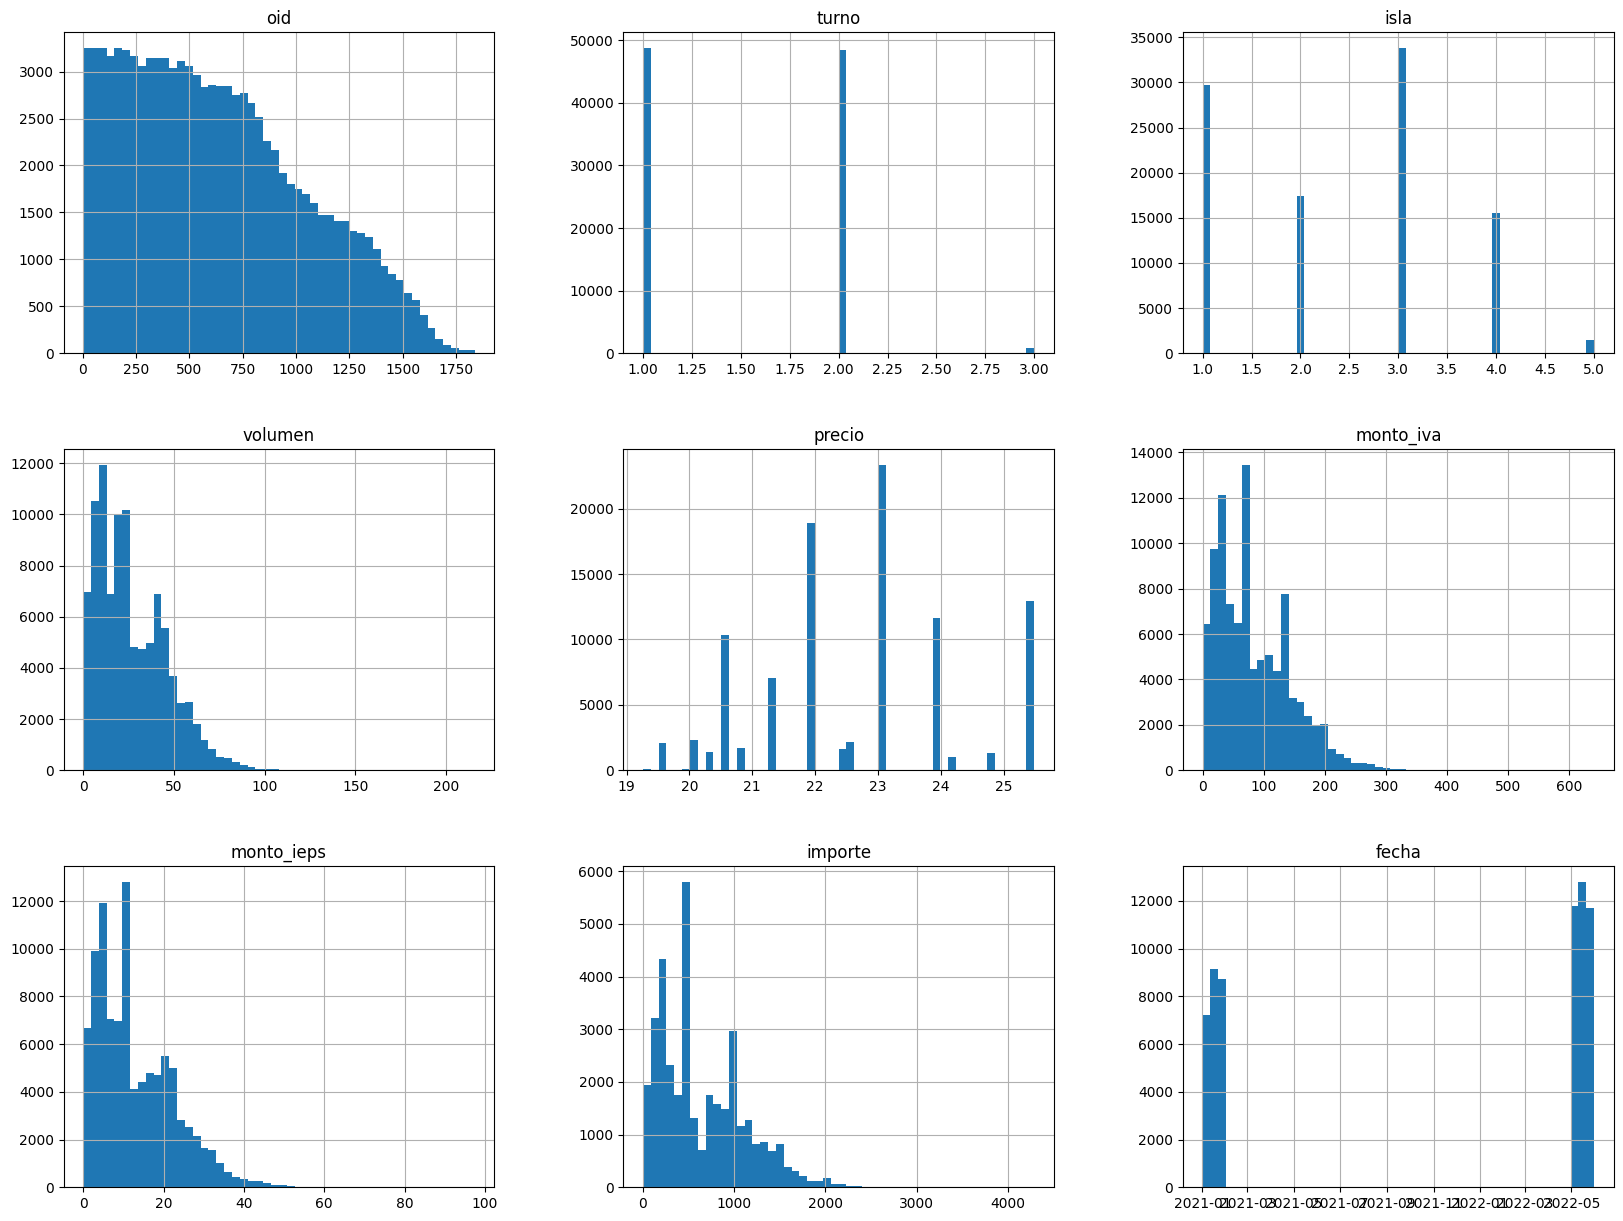

In [15]:
df_ventas_est.hist(bins=50, figsize=(20,15))
plt.show()

2.3 Visualización de Precio, Volumen de Venta por Combustible

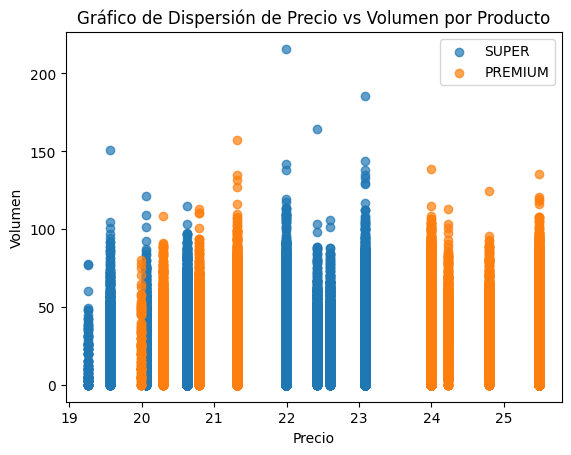

In [16]:
for producto in df_ventas_est['nom_prod'].unique():
    subset = df_ventas_est[df_ventas_est['nom_prod'] == producto]
    plt.scatter(subset['precio'], subset['volumen'], label=producto, alpha=0.7)
# Configurar etiquetas y título
plt.title('Gráfico de Dispersión de Precio vs Volumen por Producto')
plt.xlabel('Precio')
plt.ylabel('Volumen')
plt.legend()
plt.show()
#Concluimos que el valor del combustible no afecta en el volumen de salida por consumo de clientes

3. Correlación de los diferentes atributos de ventas

In [147]:
attr_numericos = df_ventas_est.select_dtypes(include='float')
corr_matrix = attr_numericos.corr()
corr_matrix['volumen'].sort_values(ascending=False)
#Los datos mas correlacionados al volumen es el importe


volumen       1.000000
importe       0.996527
monto_iva     0.992557
monto_ieps    0.984526
precio        0.174846
Name: volumen, dtype: float64

3.1 Comportamiento en Dispersión de Atributos con Mayor Correlación.

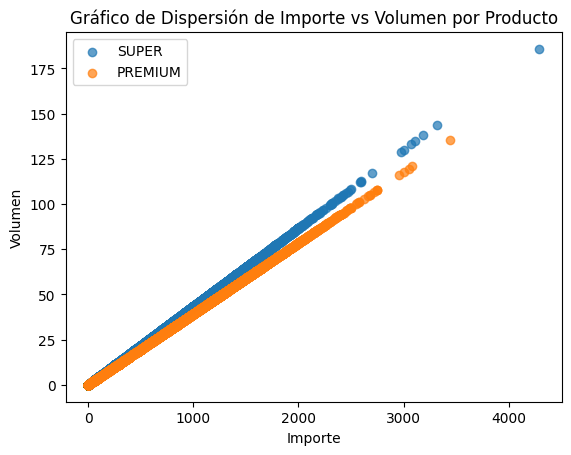

In [150]:
for producto in df_ventas_est['nom_prod'].unique():
    subset = df_ventas_est[df_ventas_est['nom_prod'] == producto]
    plt.scatter(subset['importe'], subset['volumen'], label=producto, alpha=0.7)
# Configurar etiquetas y título
plt.title('Gráfico de Dispersión de Importe vs Volumen por Producto')
plt.xlabel('Importe')
plt.ylabel('Volumen')
plt.legend()
plt.show()

3.2 Panorama de Dispersión Global.

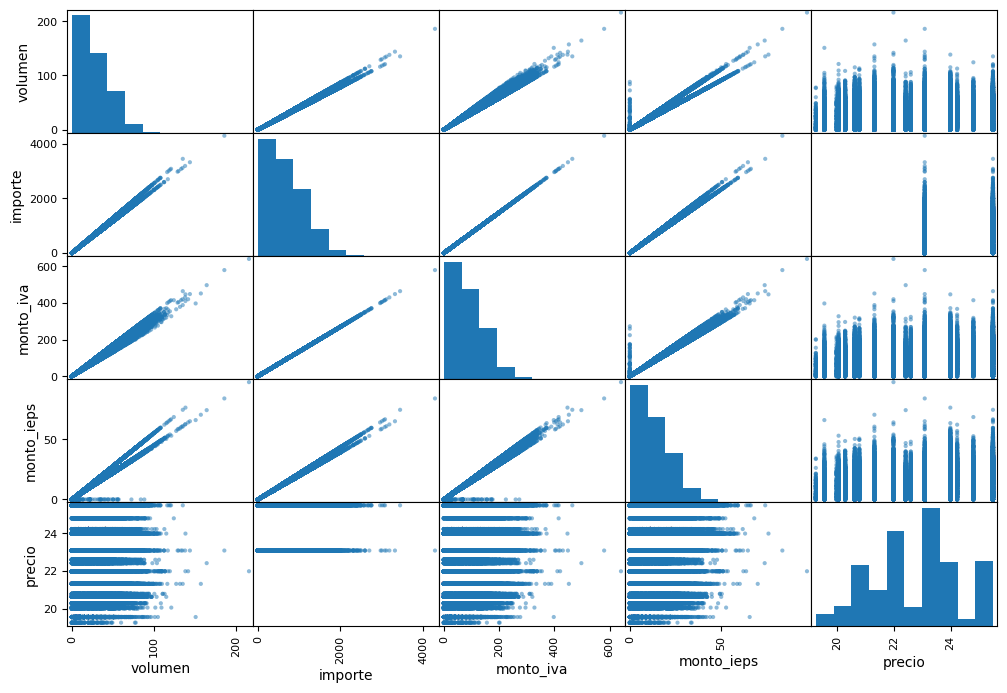

In [151]:
from pandas.plotting import scatter_matrix

attributes = ["volumen", "importe", "monto_iva","monto_ieps", "precio"]
scatter_matrix(df_ventas_est[attributes], figsize=(12, 8))
plt.show()

4. Preparación de datos para entrenamiento y pruebas

In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_ventas_est, test_size=0.2, random_state=22)

train.to_csv('datasets/entrenamiento_comb.csv', index=False)
test.to_csv('datasets/pruebas_comb.csv', index=False)

4.1 Preparación de datos de entrenamiento

In [39]:
data = pd.read_csv('datasets/entrenamiento_comb.csv')
data, volumenes = data.drop(['volumen'], axis=1), data['volumen'].copy()
data.head()

,oid,tipo,turno,isla,nom_prod,ticket,precio,monto_iva,monto_ieps,importe,fecha,cv_tanque
0,1149,D,2,2,PREMIUM (CN),9985507.0,23.99,150.266044,25.601184,NaN,21:56.0,STQ-EDS-0007
1,746,D,1,3,PREMIUM (CR),9601483.0,21.32,103.322652,16.060775,NaN,2021-01-19 08:58:26.00,NaN
2,730,D,1,2,PREMIUM (CN),9985279.0,23.99,187.326434,31.913352,NaN,06:13.0,STQ-EDS-0007
3,93,D,2,3,PREMIUM (CN),9980961.0,23.99,53.905954,9.181836,NaN,01:51.0,STQ-EDS-0007
4,267,D,2,3,SUPER (CN),NaN,23.09,32.456545,4.690046,240.0,2022-05-26 20:26:56.00,NaN


In [32]:
volumenes.head()

0    46.48
1    35.89
2    57.94
3    16.67
4    10.39
Name: volumen, dtype: float64

4.3 Separar Variables Categoricas de las Numericas

In [41]:
data_num = data.drop(['turno', 'isla', 'tipo', 'ticket','cv_tanque', 'nom_prod', 'fecha'], axis=1)
data_num.head()


,oid,precio,monto_iva,monto_ieps,importe
0,1149,23.99,150.266044,25.601184,NaN
1,746,21.32,103.322652,16.060775,NaN
2,730,23.99,187.326434,31.913352,NaN
3,93,23.99,53.905954,9.181836,NaN
4,267,23.09,32.456545,4.690046,240.0


In [55]:
data_cat = data[['turno', 'isla', 'tipo', 'nom_prod']]
data_cat.head()

,turno,isla,tipo,nom_prod
0,2,2,D,PREMIUM (CN)
1,1,3,D,PREMIUM (CR)
2,1,2,D,PREMIUM (CN)
3,2,3,D,PREMIUM (CN)
4,2,3,D,SUPER (CN)


4.4 Limpieza de Valores del Entrenamiento

In [47]:
data_num.isnull().sum()


oid               0
precio            0
monto_iva         0
monto_ieps        0
importe       49347
dtype: int64

In [48]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data_num)
imputer.statistics_


array([573.        ,  23.09      ,  67.50476469,  10.493875  ,
       500.        ])

In [49]:
X = imputer.transform(data_num)
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data.index)
data_tr.isnull().sum()

oid           0
precio        0
monto_iva     0
monto_ieps    0
importe       0
dtype: int64

One Hot Encoding
proceso mediante el cual las variables categóricas se convierten en una forma que podría proporcionarse a los algoritmos de ML

In [56]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = list(data_num)
cat_attribs = ["tipo"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)
data_prepared.shape

(78420, 7)

In [61]:
from sklearn.linear_model import LinearRegression
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, volumenes)
LinearRegression()
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_prepared, volumenes, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Promedio:", scores.mean())
    print("Desviación Estandar:", scores.std())

display_scores(lin_rmse_scores)

Scores: [0.9454302  0.9507234  0.97409665 1.00301127 1.07722044 0.97849083
 0.96618102 0.99327631 0.9987718  0.9401544 ]
Mean: 0.9827356313870699
Standard deviation: 0.03781942644495881


In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, volumenes)
DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, data_prepared, volumenes, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.13841633 0.09204657 0.08465029 0.59681924 0.11592514 0.09738391
 0.0979492  0.48643132 0.17645894 0.12596002]
Mean: 0.20120409589022764
Standard deviation: 0.1738663475151856


In [63]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(data_prepared, volumenes)
forest_scores = cross_val_score(forest_reg, data_prepared, volumenes, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.08958508 0.0647746  0.07466047 0.27934456 0.14328537 0.07525587
 0.06747361 0.77467608 0.21573615 0.06868462]
Mean: 0.18534764072921187
Standard deviation: 0.20842764812530792


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
grid_search.fit(data_prepared, volumenes)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
grid_search.best_params_


{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [66]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.569807031238936 {'max_features': 2, 'n_estimators': 3}
0.49944999766320347 {'max_features': 2, 'n_estimators': 10}
0.4723424741143303 {'max_features': 2, 'n_estimators': 30}
0.39472292674405185 {'max_features': 4, 'n_estimators': 3}
0.36084309489780264 {'max_features': 4, 'n_estimators': 10}
0.3575916520716469 {'max_features': 4, 'n_estimators': 30}
0.30279995153436007 {'max_features': 6, 'n_estimators': 3}
0.29891359252205335 {'max_features': 6, 'n_estimators': 10}
0.29697874140356567 {'max_features': 6, 'n_estimators': 30}
0.3084982464607701 {'max_features': 8, 'n_estimators': 3}
0.25642743352877934 {'max_features': 8, 'n_estimators': 10}
0.26832316877132895 {'max_features': 8, 'n_estimators': 30}
0.565394423845488 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.43893108323533603 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.3630012712404146 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.32452138499103705 {'bootstrap': False, 'max_features

In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs  + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.6482580914268019, 'monto_iva'),
 (0.3139913420042467, 'monto_ieps'),
 (0.0227285458190982, 'importe'),
 (0.014919271691562763, 'precio'),
 (0.00010214081472609854, 'oid'),
 (6.081619004656293e-07, 'J'),
 (8.166384667356696e-11, 'D')]

In [70]:
from sklearn.metrics import mean_squared_error

test_data = pd.read_csv('datasets/pruebas_comb.csv')

final_model = grid_search.best_estimator_

X_test = test_data.drop("volumen", axis=1)
y_test = test_data["volumen"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

0.0901325615602085

In [71]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.06697867, 0.10845098])

In [78]:
import joblib

joblib.dump(final_model, "my_model.pkl")
joblib.dump(full_pipeline, "my_pipeline.pkl")
['my_pipeline.pkl']
model = joblib.load("my_model.pkl")
pipeline = joblib.load("my_pipeline.pkl")
data_test = sample = pd.read_csv("datasets/pruebas_comb.csv")
sample = data_test.sample(5)
sample

,oid,tipo,turno,isla,nom_prod,ticket,volumen,precio,monto_iva,monto_ieps,importe,fecha,cv_tanque
3334,575,D,2,4,PREMIUM (CN),9993734.0,35.85,23.99,115.906734,19.746180,NaN,04:33.0,STQ-EDS-0007
17216,85,D,2,3,PREMIUM (CN),10074439.0,61.60,25.49,211.882858,33.929280,1570.08,2022-05-08 20:21:36.00,NaN
19545,1065,D,1,1,SUPER (CN),9997455.0,44.25,22.60,135.175938,19.974450,NaN,19:48.0,STQ-EDS-0002
10243,495,D,2,3,SUPER (CN),NaN,4.32,21.99,12.834476,1.950048,NaN,40:09.0,STQ-EDS-0002
12759,759,D,2,3,SUPER (CN),10094511.0,40.00,23.09,124.902621,18.056000,923.60,2022-05-28 14:19:18.00,NaN


In [81]:
X_test_prepared = pipeline.transform(sample)
final_predictions = model.predict(X_test_prepared)
final_predictions

array([35.851, 61.6  , 44.25 ,  4.32 , 40.   ])